# - VGGNet(VGG16)

In [33]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout
from keras import backend as K

In [2]:
img_dir = 'data/Images3'
categories = os.listdir(img_dir)
num_classes = len(categories)

In [3]:
image_w = 224
image_h = 224

In [4]:
X = []
y = []

for index, breed in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[index] = 1

    image_dir = img_dir + "/" + breed
    files = glob.glob(image_dir+"/*.jpg")
    print(index, ")", breed, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

0 ) n02085620-Chihuahua  파일 길이 :  152
1 ) n02085782-Japanese_spaniel  파일 길이 :  185
2 ) n02085936-Maltese_dog  파일 길이 :  252
3 ) n02086079-Pekinese  파일 길이 :  149
4 ) n02086240-Shih-Tzu  파일 길이 :  214
5 ) n02086646-Blenheim_spaniel  파일 길이 :  188
6 ) n02086910-papillon  파일 길이 :  196
7 ) n02087046-toy_terrier  파일 길이 :  172
8 ) n02087394-Rhodesian_ridgeback  파일 길이 :  172
9 ) n02088094-Afghan_hound  파일 길이 :  239
10 ) n02088238-basset  파일 길이 :  175
11 ) n02088364-beagle  파일 길이 :  195
12 ) n02088466-bloodhound  파일 길이 :  187
13 ) n02088632-bluetick  파일 길이 :  171
14 ) n02089078-black-and-tan_coonhound  파일 길이 :  159
15 ) n02089867-Walker_hound  파일 길이 :  153
16 ) n02089973-English_foxhound  파일 길이 :  157
17 ) n02090379-redbone  파일 길이 :  148
18 ) n02090622-borzoi  파일 길이 :  151
19 ) n02090721-Irish_wolfhound  파일 길이 :  218
20 ) n02091032-Italian_greyhound  파일 길이 :  182
21 ) n02091134-whippet  파일 길이 :  187
22 ) n02091244-Ibizan_hound  파일 길이 :  188
23 ) n02091467-Norwegian_elkhound  파일 길이 :  196
24 ) n020

In [5]:
X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식

In [6]:
n = np.arange(X.shape[0]) # 데이터 셔플링
np.random.seed(0)
np.random.shuffle(n)

In [7]:
X = X[n]
y = y[n]

In [8]:
print("Images shape after shuffling = ",X.shape,"\nLabels shape after shuffling = ",y.shape)

Images shape after shuffling =  (20580, 227, 227, 3) 
Labels shape after shuffling =  (20580, 120)


In [9]:
X = X.astype(np.float32)
y = y.astype(np.int32)
X = X/255.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [11]:
print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (14817, 227, 227, 3)
y_train shape =  (14817, 120)

x_val shape =  (1647, 227, 227, 3)
y_val shape =  (1647, 120)

x_test shape =  (4116, 227, 227, 3)
y_test shape =  (4116, 120)


In [25]:
model = Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(image_w,image_h,3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(65, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_27 (ZeroPaddi (None, 229, 229, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 227, 227, 64)      1792      
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 229, 229, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 227, 227, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_29 (ZeroPaddi (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 113, 113, 128)    

In [28]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
K.set_value(model.optimizer.learning_rate, 0.001)

In [29]:
history =model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), shuffle=True)

464/464 [==============================] - 16562s 36s/step - loss: 4.7874 - accuracy: 0.0091 - val_loss: 4.7873 - val_accuracy: 0.0079


In [30]:
loss, accuracy = model.evaluate(x_test, y_test)

print('\nLoss: {:.4f}, Acc: {:.4f}'.format(loss, accuracy))

129/129 [==============================] - 1193s 9s/step - loss: 4.7873 - accuracy: 0.0121

Loss: 4.7873, Acc: 0.0121


In [31]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

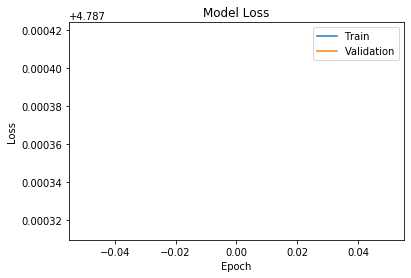

In [34]:
plot_loss(history)
plt.show()

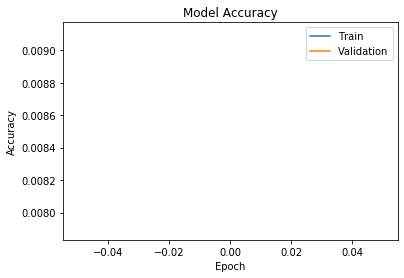

In [35]:
plot_acc(history)
plt.show()

In [36]:
predictions = model.predict(x_test)

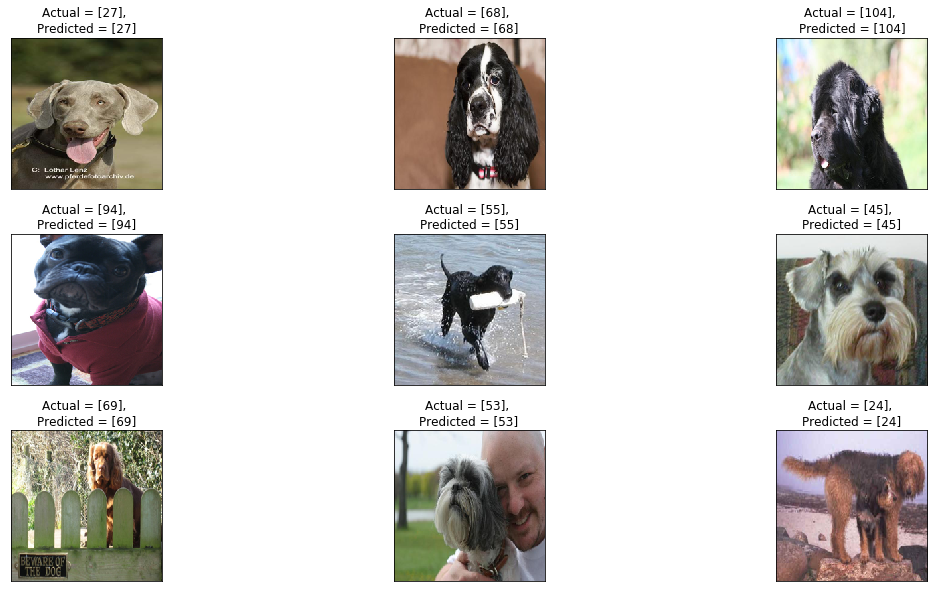

In [40]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(16):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(4, 4, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, \nPredicted = {}'.format(np.argpartition(y_test[r[0]],-1)[-1:] , np.argpartition(predictions[r[0]][y_test[r[0]]],-1)[-1:]))
    plt.xticks([]) , plt.yticks([])

plt.show()